# Plotting and comparing trap average PDFs to seasonal water column PDFs

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import wasserstein_distance
from scipy.spatial.distance import jensenshannon

Importing data

In [3]:
water_SM = pd.read_csv('../../data/LISST/corrected_GSDs/SM23_WC_normalized_GSD_corrected.csv')
trap_SM = pd.read_csv('../../data/sediment_traps/SM23_trap_normalized_GSD_LISST.csv')
water_SP = pd.read_csv('../../data/LISST/corrected_GSDs/SP23_WC_normalized_GSD_corrected.csv')
trap_SP = pd.read_csv('../../data/sediment_traps/SP23_trap_normalized_GSD_LISST.csv')

# getting information
grain_sizes = np.array(water_SM.iloc[:, 0])
water_SM_array = np.array(water_SM.iloc[:, 1:]) # spring water column
trap_SM_array = np.array(trap_SM.iloc[:, 1:]) # spring sediment traps
water_SP_array = np.array(water_SP.iloc[:, 1:]) # summer water column
trap_SP_array = np.array(trap_SP.iloc[:, 1:]) # summer sediment traps

Calculations

In [4]:
# calculating max, avg and min GSDs of the water columns
spring_wc_gsd_max = pd.DataFrame(np.max(water_SP_array, axis=1))
spring_wc_gsd_avg = pd.DataFrame(np.mean(water_SP_array, axis=1))
spring_wc_gsd_min = pd.DataFrame(np.min(water_SP_array, axis=1))
summer_wc_gsd_max = pd.DataFrame(np.max(water_SM_array, axis=1))
summer_wc_gsd_avg = pd.DataFrame(np.mean(water_SM_array, axis=1))
summer_wc_gsd_min = pd.DataFrame(np.min(water_SM_array, axis=1))
# calculating max, avg and min GSDs of the baskets
spring_st_gsd_max = pd.DataFrame(np.max(trap_SP_array, axis=1))
spring_st_gsd_avg = pd.DataFrame(np.mean(trap_SP_array, axis=1))
spring_st_gsd_min = pd.DataFrame(np.min(trap_SP_array, axis=1))
summer_st_gsd_max = pd.DataFrame(np.max(trap_SM_array, axis=1))
summer_st_gsd_avg = pd.DataFrame(np.mean(trap_SM_array, axis=1))
summer_st_gsd_min = pd.DataFrame(np.min(trap_SM_array, axis=1))

# calculating standard deviations of water columns and traps
spring_wc_gsd_std = pd.DataFrame(np.std(water_SP_array, axis=1))
summer_wc_gsd_std = pd.DataFrame(np.std(water_SM_array, axis=1))
spring_st_gsd_std = pd.DataFrame(np.std(trap_SP_array, axis=1))
summer_st_gsd_std = pd.DataFrame(np.std(trap_SM_array, axis=1))

# calculating percentiles of the water columns 
spring_wc_gsd_d90 = pd.DataFrame(np.percentile(water_SP_array, 90, axis=1))
spring_wc_gsd_d10 = pd.DataFrame(np.percentile(water_SP_array, 10, axis=1))
summer_wc_gsd_d90 = pd.DataFrame(np.percentile(water_SM_array, 90, axis=1))
summer_wc_gsd_d10 = pd.DataFrame(np.percentile(water_SM_array, 10, axis=1))
# calculating percentiles of the sediment traps
spring_st_gsd_d90 = pd.DataFrame(np.percentile(trap_SP_array, 90, axis=1))
spring_st_gsd_d10 = pd.DataFrame(np.percentile(trap_SP_array, 10, axis=1))
summer_st_gsd_d90 = pd.DataFrame(np.percentile(trap_SM_array, 90, axis=1))
summer_st_gsd_d10 = pd.DataFrame(np.percentile(trap_SM_array, 10, axis=1))


In [5]:
# add max, avg, std and min GSDs to the dataframes as new columns
water_SP["max"] = spring_wc_gsd_max
water_SP["avg"] = spring_wc_gsd_avg
water_SP["min"] = spring_wc_gsd_min
water_SP["std"] = spring_wc_gsd_std
water_SM["max"] = summer_wc_gsd_max
water_SM["avg"] = summer_wc_gsd_avg
water_SM["min"] = summer_wc_gsd_min
water_SM["std"] = summer_wc_gsd_std

trap_SP['max'] = spring_st_gsd_max
trap_SP['avg'] = spring_st_gsd_avg
trap_SP['min'] = spring_st_gsd_min
trap_SP['std'] = spring_st_gsd_std
trap_SM['max'] = summer_st_gsd_max
trap_SM['avg'] = summer_st_gsd_avg
trap_SM['min'] = summer_st_gsd_min
trap_SM['std'] = summer_st_gsd_std

# adding the percentiles to the dataframes as well
water_SP['d90'] = spring_wc_gsd_d90
water_SP['d10'] = spring_wc_gsd_d10
water_SM['d90'] = summer_wc_gsd_d90
water_SM['d10'] = summer_wc_gsd_d10
trap_SP['d90'] = spring_st_gsd_d90
trap_SP['d10'] = spring_st_gsd_d10
trap_SM['d90'] = summer_st_gsd_d90
trap_SM['d10'] = summer_st_gsd_d10

In [6]:
# loop to delete all variables that start with "summer" and "spring"
for var in list(globals().keys()):
    if var.startswith("summer") or var.startswith("spring"):
        del globals()[var]

### Plots - see other version of this notebook for individual plots

CDF calculations

In [7]:
# transforming all PDF data to CDF 
# Use axis=0 to cumsum down the rows (across grain sizes) for each sample
water_SM_cdf_array = water_SM_array.cumsum(axis=0)
trap_SM_cdf_array = trap_SM_array.cumsum(axis=0)
water_SP_cdf_array = water_SP_array.cumsum(axis=0)
trap_SP_cdf_array = trap_SP_array.cumsum(axis=0)

# create DataFrames with grain sizes as the first column
water_SM_cdf = pd.DataFrame(water_SM_cdf_array, columns=water_SM.columns[1:-6])  # skip first column name and ignore last six
water_SM_cdf.insert(0, water_SM.columns[0], grain_sizes)  # insert grain sizes as first column
water_SP_cdf = pd.DataFrame(water_SP_cdf_array, columns=water_SP.columns[1:-6])
water_SP_cdf.insert(0, water_SP.columns[0], grain_sizes)
trap_SM_cdf = pd.DataFrame(trap_SM_cdf_array, columns=trap_SM.columns[1:-6])
trap_SM_cdf.insert(0, trap_SM.columns[0], grain_sizes)
trap_SP_cdf = pd.DataFrame(trap_SP_cdf_array, columns=trap_SP.columns[1:-6])
trap_SP_cdf.insert(0, trap_SP.columns[0], grain_sizes)

In [8]:
# calculating max, avg and min GSDs of the water columns
spring_wc_gsd_max = pd.DataFrame(np.max(water_SP_cdf_array, axis=1))
spring_wc_gsd_avg = pd.DataFrame(np.mean(water_SP_cdf_array, axis=1))
spring_wc_gsd_min = pd.DataFrame(np.min(water_SP_cdf_array, axis=1))
summer_wc_gsd_max = pd.DataFrame(np.max(water_SM_cdf_array, axis=1))
summer_wc_gsd_avg = pd.DataFrame(np.mean(water_SM_cdf_array, axis=1))
summer_wc_gsd_min = pd.DataFrame(np.min(water_SM_cdf_array, axis=1))
# calculating max, avg and min GSDs of the baskets
spring_st_gsd_max = pd.DataFrame(np.max(trap_SP_cdf_array, axis=1))
spring_st_gsd_avg = pd.DataFrame(np.mean(trap_SP_cdf_array, axis=1))
spring_st_gsd_min = pd.DataFrame(np.min(trap_SP_cdf_array, axis=1))
summer_st_gsd_max = pd.DataFrame(np.max(trap_SM_cdf_array, axis=1))
summer_st_gsd_avg = pd.DataFrame(np.mean(trap_SM_cdf_array, axis=1))
summer_st_gsd_min = pd.DataFrame(np.min(trap_SM_cdf_array, axis=1))

# calculating standard deviations of water columns and traps
spring_wc_gsd_std = pd.DataFrame(np.std(water_SP_cdf_array, axis=1))
summer_wc_gsd_std = pd.DataFrame(np.std(water_SM_cdf_array, axis=1))
spring_st_gsd_std = pd.DataFrame(np.std(trap_SP_cdf_array, axis=1))
summer_st_gsd_std = pd.DataFrame(np.std(trap_SM_cdf_array, axis=1))

# calculating percentiles of the water columns 
spring_wc_gsd_d90 = pd.DataFrame(np.percentile(water_SP_cdf_array, 90, axis=1))
spring_wc_gsd_d10 = pd.DataFrame(np.percentile(water_SP_cdf_array, 10, axis=1))
summer_wc_gsd_d90 = pd.DataFrame(np.percentile(water_SM_cdf_array, 90, axis=1))
summer_wc_gsd_d10 = pd.DataFrame(np.percentile(water_SM_cdf_array, 10, axis=1))
# calculating percentiles of the sediment traps
spring_st_gsd_d90 = pd.DataFrame(np.percentile(trap_SP_cdf_array, 90, axis=1))
spring_st_gsd_d10 = pd.DataFrame(np.percentile(trap_SP_cdf_array, 10, axis=1))
summer_st_gsd_d90 = pd.DataFrame(np.percentile(trap_SM_cdf_array, 90, axis=1))
summer_st_gsd_d10 = pd.DataFrame(np.percentile(trap_SM_cdf_array, 10, axis=1))


In [9]:
# add max, avg, std and min GSDs to the dataframes as new columns
water_SP_cdf["max"] = spring_wc_gsd_max
water_SP_cdf["avg"] = spring_wc_gsd_avg
water_SP_cdf["min"] = spring_wc_gsd_min
water_SP_cdf["std"] = spring_wc_gsd_std
water_SM_cdf["max"] = summer_wc_gsd_max
water_SM_cdf["avg"] = summer_wc_gsd_avg
water_SM_cdf["min"] = summer_wc_gsd_min
water_SM_cdf["std"] = summer_wc_gsd_std

trap_SP_cdf['max'] = spring_st_gsd_max
trap_SP_cdf['avg'] = spring_st_gsd_avg
trap_SP_cdf['min'] = spring_st_gsd_min
trap_SP_cdf['std'] = spring_st_gsd_std
trap_SM_cdf['max'] = summer_st_gsd_max
trap_SM_cdf['avg'] = summer_st_gsd_avg
trap_SM_cdf['min'] = summer_st_gsd_min
trap_SM_cdf['std'] = summer_st_gsd_std

# adding the percentiles to the dataframes as well
water_SP_cdf['d90'] = spring_wc_gsd_d90
water_SP_cdf['d10'] = spring_wc_gsd_d10
water_SM_cdf['d90'] = summer_wc_gsd_d90
water_SM_cdf['d10'] = summer_wc_gsd_d10
trap_SP_cdf['d90'] = spring_st_gsd_d90
trap_SP_cdf['d10'] = spring_st_gsd_d10
trap_SM_cdf['d90'] = summer_st_gsd_d90
trap_SM_cdf['d10'] = summer_st_gsd_d10

In [10]:
# loop to delete all variables that start with "summer" and "spring" and end with "array"
for var in list(globals().keys()):
    if var.startswith("summer") or var.startswith("spring"):
        del globals()[var]
    if var.endswith('array'):
        del globals()[var]

# Using flow ranges - plots

In [11]:
discharge_SM = pd.read_csv('samples_grouped_by_Q/summer_samples_Q.csv')
discharge_SP = pd.read_csv('samples_grouped_by_Q/spring_samples_Q.csv')

### Flow range by min and max discharge

In [12]:
# add a new column to determine if high, moderate or low flow
# spring: 
discharge_SP['flow_category'] = 'Low'
discharge_SP.loc[discharge_SP['Q'] >= 0.1073, 'flow_category'] = 'Moderate'
discharge_SP.loc[discharge_SP['Q'] >= 0.2027, 'flow_category'] = 'High'
# summer: 
discharge_SM['flow_category'] = 'Low'
discharge_SM.loc[discharge_SM['Q'] >= 0.0340, 'flow_category'] = 'Moderate'
discharge_SM.loc[discharge_SM['Q'] >= 0.0660, 'flow_category'] = 'High'

# save samples by category (min and max flows)
# summer
lowflow_SM_samples = discharge_SM[discharge_SM['flow_category'] == 'Low']['Sample'].tolist()
moderate_SM_samples = discharge_SM[discharge_SM['flow_category'] == 'Moderate']['Sample'].tolist()
highflow_SM_samples = discharge_SM[discharge_SM['flow_category'] == 'High']['Sample'].tolist()
# spring 
lowflow_SP_samples = discharge_SP[discharge_SP['flow_category'] == 'Low']['Sample'].tolist()
moderate_SP_samples = discharge_SP[discharge_SP['flow_category'] == 'Moderate']['Sample'].tolist()
highflow_SP_samples = discharge_SP[discharge_SP['flow_category'] == 'High']['Sample'].tolist()

Calculate average

In [13]:
# calculate average grain size distributions
# summer
avg_low_SM = water_SM[lowflow_SM_samples].mean(axis=1) 
avg_mod_SM = water_SM[moderate_SM_samples].mean(axis=1)
avg_high_SM = water_SM[highflow_SM_samples].mean(axis=1)
# spring
avg_low_SP = water_SP[lowflow_SP_samples].mean(axis=1)
avg_mod_SP = water_SP[moderate_SP_samples].mean(axis=1)
avg_high_SP = water_SP[highflow_SP_samples].mean(axis=1)

# create a new df from the calculated averages (spring and summer)
avg_SP_pdf = pd.DataFrame({
    'avg_low': avg_low_SP,
    'avg_mod': avg_mod_SP,
    'avg_high': avg_high_SP
}).set_index(grain_sizes)

avg_SM_pdf = pd.DataFrame({
    'avg_low': avg_low_SM,
    'avg_mod': avg_mod_SM,
    'avg_high': avg_high_SM
}).set_index(grain_sizes)

print("Average Grain Size Distributions:")
print(avg_SP_pdf.head())

Average Grain Size Distributions:
      avg_low   avg_mod  avg_high
0.37      NaN  0.000351  0.000475
0.44      NaN  0.000385  0.000512
0.52      NaN  0.000438  0.000582
0.61      NaN  0.000521  0.000675
0.72      NaN  0.000636  0.000810


In [14]:
# verify that these percentages sum up to 100%
print("Sum of Average Spring GSDs:")
print(avg_SP_pdf.sum(axis=0))
print("Sum of Average Summer GSDs:")
print(avg_SM_pdf.sum(axis=0))

Sum of Average Spring GSDs:
avg_low     0.0
avg_mod     1.0
avg_high    1.0
dtype: float64
Sum of Average Summer GSDs:
avg_low     1.000003
avg_mod     1.000000
avg_high    0.000000
dtype: float64


Calculate ranges

In [15]:
# add ranges to df
water_SP = water_SP.set_index(grain_sizes)
water_SM = water_SM.set_index(grain_sizes)
# spring
avg_SP_pdf['min_low'] = water_SP[lowflow_SP_samples].min(axis=1, skipna=True) 
avg_SP_pdf['max_low'] = water_SP[lowflow_SP_samples].max(axis=1, skipna=True)
avg_SP_pdf['min_mod'] = water_SP[moderate_SP_samples].min(axis=1, skipna=True)
avg_SP_pdf['max_mod'] = water_SP[moderate_SP_samples].max(axis=1, skipna=True)
avg_SP_pdf['min_high'] = water_SP[highflow_SP_samples].min(axis=1, skipna=True)
avg_SP_pdf['max_high'] = water_SP[highflow_SP_samples].max(axis=1, skipna=True)
# summer 
avg_SM_pdf['min_low'] = water_SM[lowflow_SM_samples].min(axis=1, skipna=True)
avg_SM_pdf['max_low'] = water_SM[lowflow_SM_samples].max(axis=1, skipna=True)
avg_SM_pdf['min_mod'] = water_SM[moderate_SM_samples].min(axis=1, skipna=True)
avg_SM_pdf['max_mod'] = water_SM[moderate_SM_samples].max(axis=1, skipna=True)
avg_SM_pdf['min_high'] = water_SM[highflow_SM_samples].min(axis=1, skipna=True)
avg_SM_pdf['max_high'] = water_SM[highflow_SM_samples].max(axis=1, skipna=True)

Plot PDFs

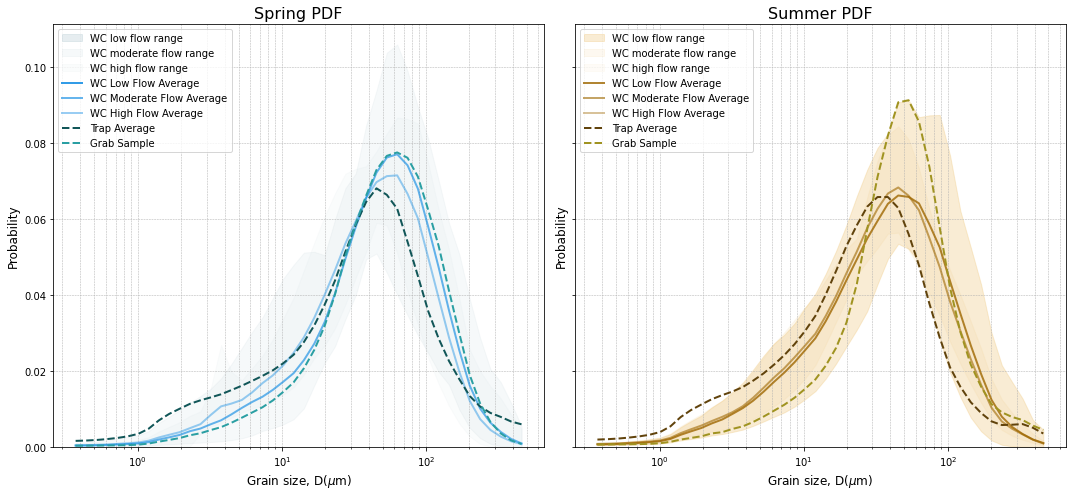

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharey=True)

# SPRING 
ax[0].fill_between(grain_sizes, avg_SP_pdf['min_low'], avg_SP_pdf['max_low'], color="#AEC6CF", alpha=0.3, label='WC low flow range')
ax[0].fill_between(grain_sizes, avg_SP_pdf['min_mod'], avg_SP_pdf['max_mod'], color="#AEC6CF", alpha=0.1, label='WC moderate flow range')
ax[0].fill_between(grain_sizes, avg_SP_pdf['min_high'], avg_SP_pdf['max_high'], color="#AEC6CF", alpha=0.05, label='WC high flow range')
# plot the average lines
ax[0].plot(grain_sizes, avg_SP_pdf['avg_low'], color="#0084E2", linewidth=2, label='WC Low Flow Average', alpha=0.8)
ax[0].plot(grain_sizes, avg_SP_pdf['avg_mod'], color="#0084E2", linewidth=2, label='WC Moderate Flow Average', alpha=0.6)
ax[0].plot(grain_sizes, avg_SP_pdf['avg_high'], color="#0084E2", linewidth=2, label='WC High Flow Average', alpha=0.4)
ax[0].plot(grain_sizes, trap_SP['avg'], color="#115658", linewidth=2, linestyle='--', label='Trap Average')
ax[0].plot(grain_sizes, water_SP['GS'], color="#2A9FA3", linewidth=2, linestyle='--', label='Grab Sample')
# labels
ax[0].set_title('Spring PDF', fontsize=16)
ax[0].set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax[0].set_ylabel('Probability', fontsize=12)
ax[0].set_xscale('log')
ax[0].set_ylim(bottom=0)
ax[0].legend(loc='upper left', frameon=True, fontsize=10)
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# SUMMER
ax[1].fill_between(grain_sizes, avg_SM_pdf['min_low'], avg_SM_pdf['max_low'], color="#EEC372", alpha=0.3, label='WC low flow range')
ax[1].fill_between(grain_sizes, avg_SM_pdf['min_mod'], avg_SM_pdf['max_mod'], color="#EEC372", alpha=0.1, label='WC moderate flow range')
ax[1].fill_between(grain_sizes, avg_SM_pdf['min_high'], avg_SM_pdf['max_high'], color="#EEC372", alpha=0.05, label='WC high flow range')
# plot the average lines
ax[1].plot(grain_sizes, avg_SM_pdf['avg_low'], color="#9E6700", linewidth=2, label='WC Low Flow Average', alpha=0.8)
ax[1].plot(grain_sizes, avg_SM_pdf['avg_mod'], color="#9E6700", linewidth=2, label='WC Moderate Flow Average', alpha=0.6)
ax[1].plot(grain_sizes, avg_SM_pdf['avg_high'], color="#9E6700", linewidth=2, label='WC High Flow Average', alpha=0.4)
ax[1].plot(grain_sizes, trap_SM['avg'], color="#61430C", linewidth=2, linestyle='--', label='Trap Average')
ax[1].plot(grain_sizes, water_SM['GS'], color="#A09321", linewidth=2, linestyle='--', label='Grab Sample')
# labels
ax[1].set_title('Summer PDF', fontsize=16)
ax[1].set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax[1].set_ylabel('Probability', fontsize=12)
ax[1].set_xscale('log')
ax[1].set_ylim(bottom=0)
ax[1].legend(loc='upper left', frameon=True, fontsize=10)
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.savefig('plots/total_Q_range/samples_flow_category_PDF.png', dpi=500)
plt.show()

Plot CDF

In [17]:
avg_SP_cdf = avg_SP_pdf.cumsum(axis=0)
avg_SM_cdf = avg_SM_pdf.cumsum(axis=0)

# re-calculate minimum and maximums from CDFs 
water_SP_cdf = water_SP_cdf.set_index(grain_sizes)
water_SM_cdf = water_SM_cdf.set_index(grain_sizes)
# spring
avg_SP_cdf['min_low'] = water_SP_cdf[lowflow_SP_samples].min(axis=1, skipna=True) 
avg_SP_cdf['max_low'] = water_SP_cdf[lowflow_SP_samples].max(axis=1, skipna=True)
avg_SP_cdf['min_mod'] = water_SP_cdf[moderate_SP_samples].min(axis=1, skipna=True)
avg_SP_cdf['max_mod'] = water_SP_cdf[moderate_SP_samples].max(axis=1, skipna=True)
avg_SP_cdf['min_high'] = water_SP_cdf[highflow_SP_samples].min(axis=1, skipna=True)
avg_SP_cdf['max_high'] = water_SP_cdf[highflow_SP_samples].max(axis=1, skipna=True)
# summer 
avg_SM_cdf['min_low'] = water_SM_cdf[lowflow_SM_samples].min(axis=1, skipna=True)
avg_SM_cdf['max_low'] = water_SM_cdf[lowflow_SM_samples].max(axis=1, skipna=True)
avg_SM_cdf['min_mod'] = water_SM_cdf[moderate_SM_samples].min(axis=1, skipna=True)
avg_SM_cdf['max_mod'] = water_SM_cdf[moderate_SM_samples].max(axis=1, skipna=True)
avg_SM_cdf['min_high'] = water_SM_cdf[highflow_SM_samples].min(axis=1, skipna=True)
avg_SM_cdf['max_high'] = water_SM_cdf[highflow_SM_samples].max(axis=1, skipna=True)

In [18]:
# print the last 5 rows
print(avg_SP_cdf.tail())

        avg_low   avg_mod  avg_high  min_low  max_low   min_mod   max_mod  \
237.35      NaN  0.986595  0.990532      NaN      NaN  0.947496  0.998899   
280.09      NaN  0.992973  0.995012      NaN      NaN  0.965960  0.999734   
330.52      NaN  0.996929  0.997743      NaN      NaN  0.982998  0.999961   
390.04      NaN  0.999044  0.999243      NaN      NaN  0.994539  1.000000   
460.27      NaN  1.000000  1.000000      NaN      NaN  1.000000  1.000000   

        min_high  max_high  
237.35  0.958011  0.999814  
280.09  0.973984  0.999969  
330.52  0.986750  0.999994  
390.04  0.995265  1.000000  
460.27  1.000000  1.000000  


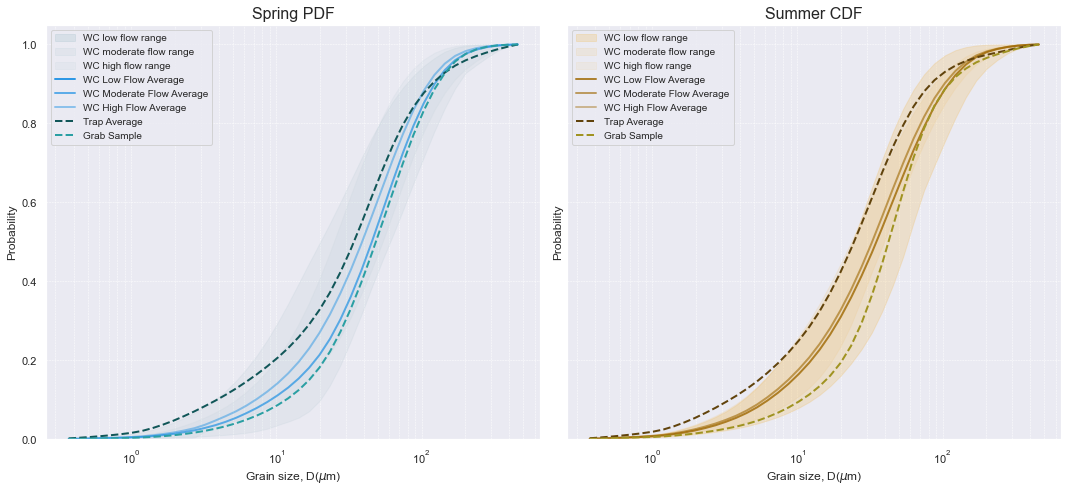

In [22]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharey=True)

# SPRING 
ax[0].fill_between(grain_sizes, avg_SP_cdf['min_low'], avg_SP_cdf['max_low'], color="#AEC6CF", alpha=0.3, label='WC low flow range')
ax[0].fill_between(grain_sizes, avg_SP_cdf['min_mod'], avg_SP_cdf['max_mod'], color="#AEC6CF", alpha=0.15, label='WC moderate flow range')
ax[0].fill_between(grain_sizes, avg_SP_cdf['min_high'], avg_SP_cdf['max_high'], color="#AEC6CF", alpha=0.1, label='WC high flow range')
# plot the average lines
ax[0].plot(grain_sizes, avg_SP_cdf['avg_low'], color="#0084E2", linewidth=2, label='WC Low Flow Average', alpha=0.8)
ax[0].plot(grain_sizes, avg_SP_cdf['avg_mod'], color="#0084E2", linewidth=2, label='WC Moderate Flow Average', alpha=0.6)
ax[0].plot(grain_sizes, avg_SP_cdf['avg_high'], color="#0084E2", linewidth=2, label='WC High Flow Average', alpha=0.4)
ax[0].plot(grain_sizes, trap_SP_cdf['avg'], color="#115658", linewidth=2, linestyle='--', label='Trap Average')
ax[0].plot(grain_sizes, water_SP_cdf['GS'], color="#2A9FA3", linewidth=2, linestyle='--', label='Grab Sample')
# labels
ax[0].set_title('Spring PDF', fontsize=16)
ax[0].set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax[0].set_ylabel('Probability', fontsize=12)
ax[0].set_xscale('log')
ax[0].set_ylim(bottom=0)
ax[0].legend(loc='upper left', frameon=True, fontsize=10)
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# SUMMER
ax[1].fill_between(grain_sizes, avg_SM_cdf['min_low'], avg_SM_cdf['max_low'], color="#EEC372", alpha=0.3, label='WC low flow range')
ax[1].fill_between(grain_sizes, avg_SM_cdf['min_mod'], avg_SM_cdf['max_mod'], color="#EEC372", alpha=0.15, label='WC moderate flow range')
ax[1].fill_between(grain_sizes, avg_SM_cdf['min_high'], avg_SM_cdf['max_high'], color="#EEC372", alpha=0.1, label='WC high flow range')
# plot the average lines
ax[1].plot(grain_sizes, avg_SM_cdf['avg_low'], color="#9E6700", linewidth=2, label='WC Low Flow Average', alpha=0.8)
ax[1].plot(grain_sizes, avg_SM_cdf['avg_mod'], color="#9E6700", linewidth=2, label='WC Moderate Flow Average', alpha=0.6)
ax[1].plot(grain_sizes, avg_SM_cdf['avg_high'], color="#9E6700", linewidth=2, label='WC High Flow Average', alpha=0.4)
ax[1].plot(grain_sizes, trap_SM_cdf['avg'], color="#61430C", linewidth=2, linestyle='--', label='Trap Average')
ax[1].plot(grain_sizes, water_SM_cdf['GS'], color="#A09321", linewidth=2, linestyle='--', label='Grab Sample')
# labels
ax[1].set_title('Summer CDF', fontsize=16)
ax[1].set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax[1].set_ylabel('Probability', fontsize=12)
ax[1].set_xscale('log')
ax[1].set_ylim(bottom=0)
ax[1].legend(loc='upper left', frameon=True, fontsize=10)
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.savefig('plots/total_Q_range/samples_flow_category_CDF.png', dpi=500)
plt.show()

In [44]:
# delete all variables that start with low, mod, and avg (except for pdf)
del lowflow_SM_samples, moderate_SM_samples, highflow_SM_samples
del lowflow_SP_samples, moderate_SP_samples, highflow_SP_samples
del avg_low_SM, avg_mod_SM, avg_high_SM, avg_low_SP, avg_mod_SP, avg_high_SP

### Discrete Flow Magnitudes

In [49]:
# add a new column to save the discrete flow magnitude
# spring: 
discharge_SP['flow_group'] = '0.01'
discharge_SP.loc[discharge_SP['Q'] >= 0.04, 'flow_group'] = '0.04'
discharge_SP.loc[discharge_SP['Q'] >= 0.07, 'flow_group'] = '0.07'
discharge_SP.loc[discharge_SP['Q'] >= 0.1, 'flow_group'] = '0.1'
discharge_SP.loc[discharge_SP['Q'] >= 0.13, 'flow_group'] = '0.13'
discharge_SP.loc[discharge_SP['Q'] >= 0.16, 'flow_group'] = '0.16'
discharge_SP.loc[discharge_SP['Q'] >= 0.19, 'flow_group'] = '0.19'
discharge_SP.loc[discharge_SP['Q'] >= 0.21, 'flow_group'] = '0.21'
discharge_SP.loc[discharge_SP['Q'] >= 0.24, 'flow_group'] = '0.24'
discharge_SP.loc[discharge_SP['Q'] >= 0.27, 'flow_group'] = '0.27'
discharge_SP.loc[discharge_SP['Q'] >= 0.3, 'flow_group'] = '0.3'
# summer:
discharge_SM['flow_group'] = '0.001'
discharge_SM.loc[discharge_SM['Q'] >= 0.011, 'flow_group'] = '0.011'
discharge_SM.loc[discharge_SM['Q'] >= 0.021, 'flow_group'] = '0.021'
discharge_SM.loc[discharge_SM['Q'] >= 0.031, 'flow_group'] = '0.031'
discharge_SM.loc[discharge_SM['Q'] >= 0.041, 'flow_group'] = '0.041'
discharge_SM.loc[discharge_SM['Q'] >= 0.051, 'flow_group'] = '0.051'
discharge_SM.loc[discharge_SM['Q'] >= 0.061, 'flow_group'] = '0.061'
discharge_SM.loc[discharge_SM['Q'] >= 0.071, 'flow_group'] = '0.071'
discharge_SM.loc[discharge_SM['Q'] >= 0.081, 'flow_group'] = '0.081'
discharge_SM.loc[discharge_SM['Q'] >= 0.091, 'flow_group'] = '0.091'


# get list of samples for each flow group
# spring
samples_sp_001 = discharge_SP[discharge_SP['flow_group'] == '0.01']['Sample'].tolist()
samples_sp_004 = discharge_SP[discharge_SP['flow_group'] == '0.04']['Sample'].tolist()
samples_sp_007 = discharge_SP[discharge_SP['flow_group'] == '0.07']['Sample'].tolist()
samples_sp_010 = discharge_SP[discharge_SP['flow_group'] == '0.1']['Sample'].tolist()
samples_sp_013 = discharge_SP[discharge_SP['flow_group'] == '0.13']['Sample'].tolist()
samples_sp_016 = discharge_SP[discharge_SP['flow_group'] == '0.16']['Sample'].tolist()
samples_sp_019 = discharge_SP[discharge_SP['flow_group'] == '0.19']['Sample'].tolist()
samples_sp_021 = discharge_SP[discharge_SP['flow_group'] == '0.21']['Sample'].tolist()
samples_sp_024 = discharge_SP[discharge_SP['flow_group'] == '0.24']['Sample'].tolist()
samples_sp_027 = discharge_SP[discharge_SP['flow_group'] == '0.27']['Sample'].tolist()
samples_sp_030 = discharge_SP[discharge_SP['flow_group'] == '0.30']['Sample'].tolist()


# summer
samples_sm_001 = discharge_SM[discharge_SM['flow_group'] == '0.001']['Sample'].tolist()
samples_sm_011 = discharge_SM[discharge_SM['flow_group'] == '0.011']['Sample'].tolist()
samples_sm_021 = discharge_SM[discharge_SM['flow_group'] == '0.021']['Sample'].tolist()
samples_sm_031 = discharge_SM[discharge_SM['flow_group'] == '0.031']['Sample'].tolist()
samples_sm_041 = discharge_SM[discharge_SM['flow_group'] == '0.041']['Sample'].tolist()
samples_sm_051 = discharge_SM[discharge_SM['flow_group'] == '0.051']['Sample'].tolist()
samples_sm_061 = discharge_SM[discharge_SM['flow_group'] == '0.061']['Sample'].tolist()
samples_sm_071 = discharge_SM[discharge_SM['flow_group'] == '0.071']['Sample'].tolist()
samples_sm_081 = discharge_SM[discharge_SM['flow_group'] == '0.081']['Sample'].tolist()
samples_sm_091 = discharge_SM[discharge_SM['flow_group'] == '0.091']['Sample'].tolist()


Calculate Average

In [50]:
# spring avg
avg_SP_pdf['0.01'] = water_SP[samples_sp_001].mean(axis=1)
avg_SP_pdf['0.04'] = water_SP[samples_sp_004].mean(axis=1)
avg_SP_pdf['0.07'] = water_SP[samples_sp_007].mean(axis=1)
avg_SP_pdf['0.1'] = water_SP[samples_sp_010].mean(axis=1)
avg_SP_pdf['0.13'] = water_SP[samples_sp_013].mean(axis=1)
avg_SP_pdf['0.16'] = water_SP[samples_sp_016].mean(axis=1)
avg_SP_pdf['0.19'] = water_SP[samples_sp_019].mean(axis=1)
avg_SP_pdf['0.21'] = water_SP[samples_sp_021].mean(axis=1)
avg_SP_pdf['0.24'] = water_SP[samples_sp_024].mean(axis=1)
avg_SP_pdf['0.27'] = water_SP[samples_sp_027].mean(axis=1)
avg_SP_pdf['0.30'] = water_SP[samples_sp_030].mean(axis=1)

# summer avg
avg_SM_pdf['0.001'] = water_SM[samples_sm_001].mean(axis=1)
avg_SM_pdf['0.011'] = water_SM[samples_sm_011].mean(axis=1)
avg_SM_pdf['0.021'] = water_SM[samples_sm_021].mean(axis=1)
avg_SM_pdf['0.031'] = water_SM[samples_sm_031].mean(axis=1)
avg_SM_pdf['0.041'] = water_SM[samples_sm_041].mean(axis=1)
avg_SM_pdf['0.051'] = water_SM[samples_sm_051].mean(axis=1)
avg_SM_pdf['0.061'] = water_SM[samples_sm_061].mean(axis=1)
avg_SM_pdf['0.071'] = water_SM[samples_sm_071].mean(axis=1)
avg_SM_pdf['0.081'] = water_SM[samples_sm_081].mean(axis=1)
avg_SM_pdf['0.091'] = water_SM[samples_sm_091].mean(axis=1)

In [53]:
# verify that these percentages sum up to 100%
print("Sum of Average Spring GSDs:")
print(avg_SP_pdf.sum(axis=0).tail())
print("Sum of Average Summer GSDs:")
print(avg_SM_pdf.sum(axis=0).tail())

Sum of Average Spring GSDs:
0.19    1.0
0.21    1.0
0.24    1.0
0.27    1.0
0.30    0.0
dtype: float64
Sum of Average Summer GSDs:
0.051    0.999985
0.061    0.000000
0.071    0.000000
0.081    0.000000
0.091    0.000000
dtype: float64


In [69]:
# delete all variables that start with "sample"
for var in list(globals().keys()):
    if var.startswith("sample"):
        del globals()[var]

Plot PDFs

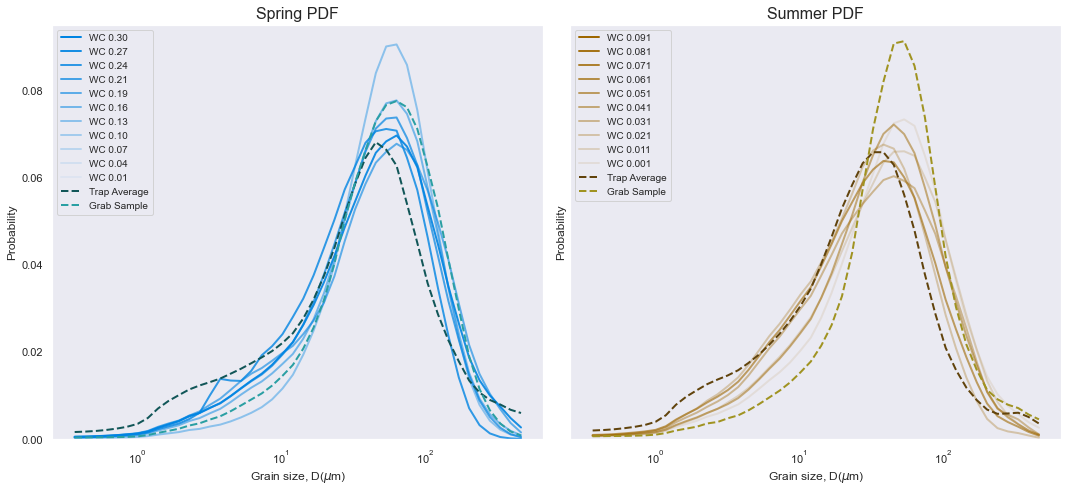

In [58]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharey=True)

# SPRING 
# plot the average lines
ax[0].plot(grain_sizes, avg_SP_pdf['0.30'], color="#0084E2", linewidth=2, label='WC 0.30', alpha=1)
ax[0].plot(grain_sizes, avg_SP_pdf['0.27'], color="#0084E2", linewidth=2, label='WC 0.27', alpha=0.9)
ax[0].plot(grain_sizes, avg_SP_pdf['0.24'], color="#0084E2", linewidth=2, label='WC 0.24', alpha=0.8)
ax[0].plot(grain_sizes, avg_SP_pdf['0.21'], color="#0084E2", linewidth=2, label='WC 0.21', alpha=0.7)
ax[0].plot(grain_sizes, avg_SP_pdf['0.19'], color="#0084E2", linewidth=2, label='WC 0.19', alpha=0.6)
ax[0].plot(grain_sizes, avg_SP_pdf['0.16'], color="#0084E2", linewidth=2, label='WC 0.16', alpha=0.5)
ax[0].plot(grain_sizes, avg_SP_pdf['0.13'], color="#0084E2", linewidth=2, label='WC 0.13', alpha=0.4)
ax[0].plot(grain_sizes, avg_SP_pdf['0.1'], color="#0084E2", linewidth=2, label='WC 0.10', alpha=0.3)
ax[0].plot(grain_sizes, avg_SP_pdf['0.07'], color="#0084E2", linewidth=2, label='WC 0.07', alpha=0.2)
ax[0].plot(grain_sizes, avg_SP_pdf['0.04'], color="#0084E2", linewidth=2, label='WC 0.04', alpha=0.1)
ax[0].plot(grain_sizes, avg_SP_pdf['0.01'], color="#0084E2", linewidth=2, label='WC 0.01', alpha=0.05)
ax[0].plot(grain_sizes, trap_SP['avg'], color="#115658", linewidth=2, linestyle='--', label='Trap Average')
ax[0].plot(grain_sizes, water_SP['GS'], color="#2A9FA3", linewidth=2, linestyle='--', label='Grab Sample')
# labels
ax[0].set_title('Spring PDF', fontsize=16)
ax[0].set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax[0].set_ylabel('Probability', fontsize=12)
ax[0].set_xscale('log')
ax[0].set_ylim(bottom=0)
ax[0].legend(loc='upper left', frameon=True, fontsize=10)
ax[0].grid(False)

# SUMMER
# plot the average lines
ax[1].plot(grain_sizes, avg_SM_pdf['0.091'], color="#9E6700", linewidth=2, label='WC 0.091', alpha=1)
ax[1].plot(grain_sizes, avg_SM_pdf['0.081'], color="#9E6700", linewidth=2, label='WC 0.081', alpha=0.9)
ax[1].plot(grain_sizes, avg_SM_pdf['0.071'], color="#9E6700", linewidth=2, label='WC 0.071', alpha=0.8)
ax[1].plot(grain_sizes, avg_SM_pdf['0.061'], color="#9E6700", linewidth=2, label='WC 0.061', alpha=0.7)
ax[1].plot(grain_sizes, avg_SM_pdf['0.051'], color="#9E6700", linewidth=2, label='WC 0.051', alpha=0.6)
ax[1].plot(grain_sizes, avg_SM_pdf['0.041'], color="#9E6700", linewidth=2, label='WC 0.041', alpha=0.5)
ax[1].plot(grain_sizes, avg_SM_pdf['0.031'], color="#9E6700", linewidth=2, label='WC 0.031', alpha=0.4)
ax[1].plot(grain_sizes, avg_SM_pdf['0.021'], color="#9E6700", linewidth=2, label='WC 0.021', alpha=0.3)
ax[1].plot(grain_sizes, avg_SM_pdf['0.011'], color="#9E6700", linewidth=2, label='WC 0.011', alpha=0.2)
ax[1].plot(grain_sizes, avg_SM_pdf['0.001'], color="#9E6700", linewidth=2, label='WC 0.001', alpha=0.1)
ax[1].plot(grain_sizes, trap_SM['avg'], color="#61430C", linewidth=2, linestyle='--', label='Trap Average')
ax[1].plot(grain_sizes, water_SM['GS'], color="#A09321", linewidth=2, linestyle='--', label='Grab Sample')
# labels
ax[1].set_title('Summer PDF', fontsize=16)
ax[1].set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax[1].set_ylabel('Probability', fontsize=12)
ax[1].set_xscale('log')
ax[1].set_ylim(bottom=0)
ax[1].legend(loc='upper left', frameon=True, fontsize=10)
ax[1].grid(False)

plt.tight_layout()
plt.savefig('plots/total_Q_range/samples_discflow_group_PDF.png', dpi=500)
plt.show()

Using a cmap for easier visualization

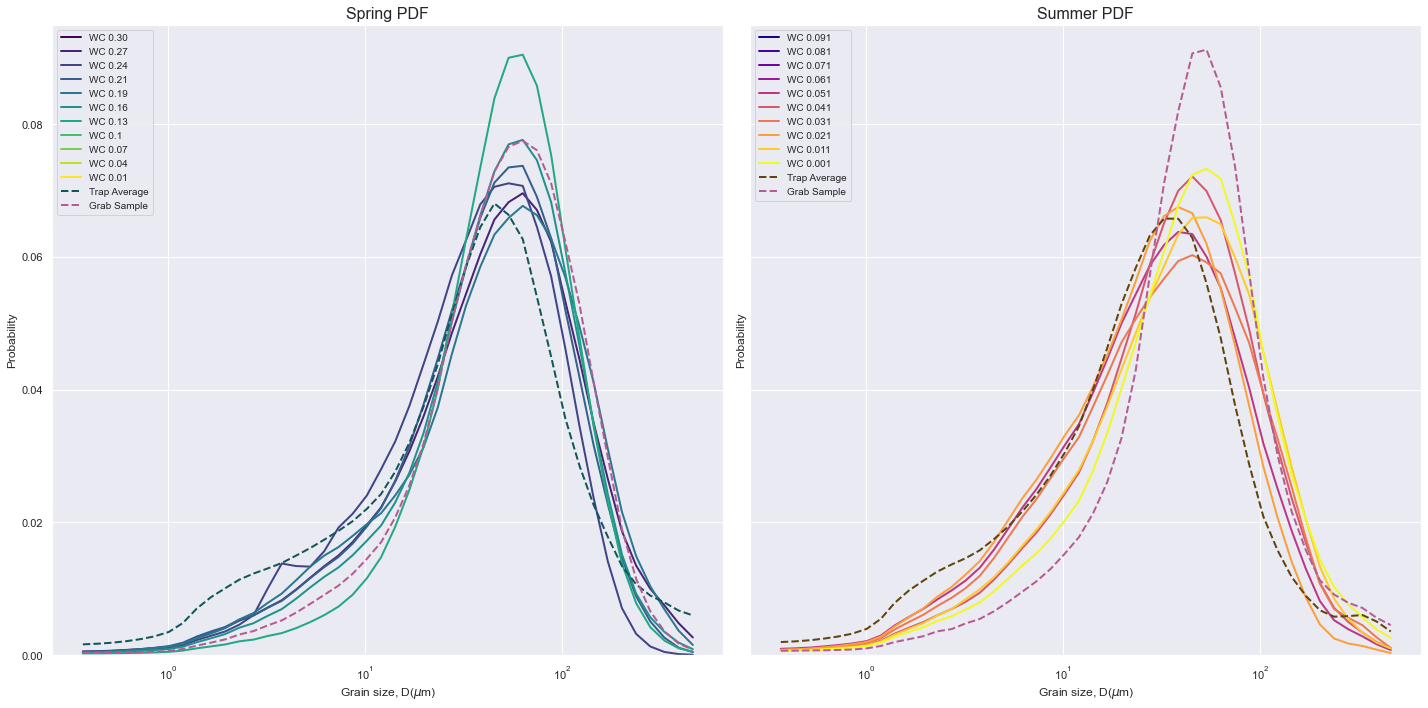

In [66]:
sns.set_style("darkgrid") 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey=True)

# SPRING 
spring_cols_to_plot = sorted([col for col in avg_SP_pdf.columns if col.replace('.', '', 1).isdigit()], key=float, reverse=True)
spring_cmap = plt.get_cmap('viridis')
spring_colors = [spring_cmap(i) for i in np.linspace(0, 1, len(spring_cols_to_plot))]

for i, col in enumerate(spring_cols_to_plot):
    ax[0].plot(
        grain_sizes,
        avg_SP_pdf[col],
        color=spring_colors[i],
        linewidth=2,
        label=f'WC {col}'
    )

ax[0].plot(grain_sizes, trap_SP['avg'], color="#115658", linewidth=2, linestyle='--', label='Trap Average')
ax[0].plot(grain_sizes, water_SP['GS'], color="#B65B93", linewidth=2, linestyle='--', label='Grab Sample')

ax[0].set_title('Spring PDF', fontsize=16)
ax[0].set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax[0].set_ylabel('Probability', fontsize=12)
ax[0].set_xscale('log')
ax[0].set_ylim(bottom=0)
ax[0].legend(loc='upper left', frameon=True, fontsize=10)
ax[0].grid(True)


# SUMMER
summer_cols_to_plot = sorted([col for col in avg_SM_pdf.columns if col.replace('.', '', 1).isdigit()], key=float, reverse=True)
summer_cmap = plt.get_cmap('plasma')
summer_colors = [summer_cmap(i) for i in np.linspace(0, 1, len(summer_cols_to_plot))]

for i, col in enumerate(summer_cols_to_plot):
    ax[1].plot(
        grain_sizes,
        avg_SM_pdf[col],
        color=summer_colors[i],
        linewidth=2,
        label=f'WC {col}'
    )

ax[1].plot(grain_sizes, trap_SM['avg'], color="#61430C", linewidth=2, linestyle='--', label='Trap Average')
ax[1].plot(grain_sizes, water_SM['GS'], color="#B65B93", linewidth=2, linestyle='--', label='Grab Sample')

ax[1].set_title('Summer PDF', fontsize=16)
ax[1].set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax[1].set_ylabel('Probability', fontsize=12)
ax[1].set_xscale('log')
ax[1].set_ylim(bottom=0)
ax[1].legend(loc='upper left', frameon=True, fontsize=10)
ax[1].grid(True)

plt.tight_layout()
plt.savefig('plots/total_Q_range/samples_discflow_group_PDF.png', dpi=500)
plt.show()

Plot CDFs

In [65]:
avg_SP_cdf = avg_SP_pdf.cumsum(axis=0)
avg_SM_cdf = avg_SM_pdf.cumsum(axis=0)

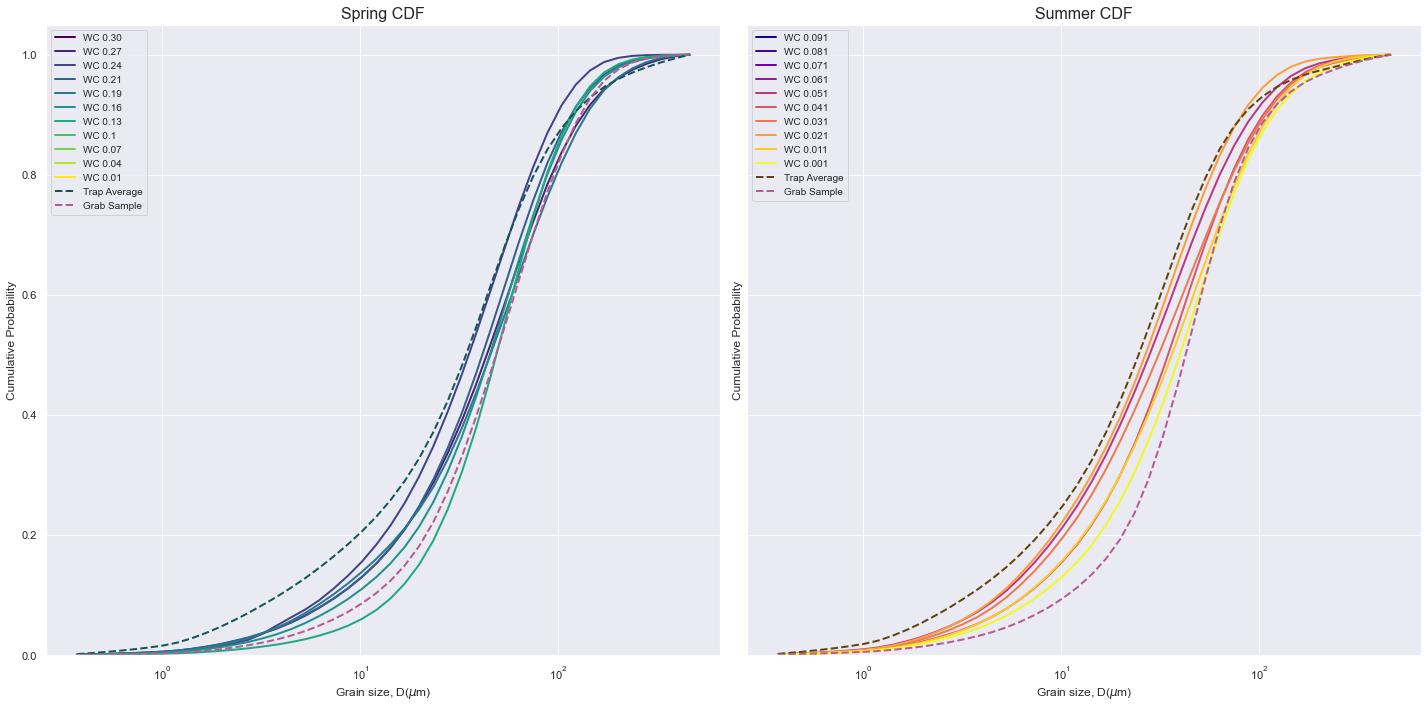

In [68]:
sns.set_style("darkgrid") 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey=True)

# SPRING 
spring_cols_to_plot = sorted([col for col in avg_SP_cdf.columns if col.replace('.', '', 1).isdigit()], key=float, reverse=True)
spring_cmap = plt.get_cmap('viridis')
spring_colors = [spring_cmap(i) for i in np.linspace(0, 1, len(spring_cols_to_plot))]

for i, col in enumerate(spring_cols_to_plot):
    ax[0].plot(
        grain_sizes,
        avg_SP_cdf[col],
        color=spring_colors[i],
        linewidth=2,
        label=f'WC {col}'
    )

ax[0].plot(grain_sizes, trap_SP_cdf['avg'], color="#115658", linewidth=2, linestyle='--', label='Trap Average')
ax[0].plot(grain_sizes, water_SP_cdf['GS'], color="#B65B93", linewidth=2, linestyle='--', label='Grab Sample')

ax[0].set_title('Spring CDF', fontsize=16)
ax[0].set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax[0].set_ylabel('Cumulative Probability', fontsize=12)
ax[0].set_xscale('log')
ax[0].set_ylim(bottom=0)
ax[0].legend(loc='upper left', frameon=True, fontsize=10)
ax[0].grid(True)


# SUMMER
summer_cols_to_plot = sorted([col for col in avg_SM_cdf.columns if col.replace('.', '', 1).isdigit()], key=float, reverse=True)
summer_cmap = plt.get_cmap('plasma')
summer_colors = [summer_cmap(i) for i in np.linspace(0, 1, len(summer_cols_to_plot))]

for i, col in enumerate(summer_cols_to_plot):
    ax[1].plot(
        grain_sizes,
        avg_SM_cdf[col],
        color=summer_colors[i],
        linewidth=2,
        label=f'WC {col}'
    )

ax[1].plot(grain_sizes, trap_SM_cdf['avg'], color="#61430C", linewidth=2, linestyle='--', label='Trap Average')
ax[1].plot(grain_sizes, water_SM_cdf['GS'], color="#B65B93", linewidth=2, linestyle='--', label='Grab Sample')

ax[1].set_title('Summer CDF', fontsize=16)
ax[1].set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax[1].set_ylabel('Cumulative Probability', fontsize=12)
ax[1].set_xscale('log')
ax[1].set_ylim(bottom=0)
ax[1].legend(loc='upper left', frameon=True, fontsize=10)
ax[1].grid(True)

plt.tight_layout()
plt.savefig('plots/total_Q_range/samples_discflow_group_CDF.png', dpi=500)
plt.show()